In [6]:
import matplotlib.pyplot as plt
import pandas as pd
!pip install pandas-profiling

  Using cached typing_extensions-4.11.0-py3-none-any.whl.metadata (3.0 kB)
Using cached typing_extensions-4.11.0-py3-none-any.whl (34 kB)
  Attempting uninstall: typing-extensions
    Found existing installation: typing_extensions 4.5.0
    Uninstalling typing_extensions-4.5.0:
      Successfully uninstalled typing_extensions-4.5.0


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-intel 2.13.1 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.11.0 which is incompatible.
ydata-profiling 4.7.0 requires visions[type_image_path]<0.7.7,>=0.7.5, but you have visions 0.7.4 which is incompatible.


                                                  title  score       id  \
0     Can someone help explain to me how and why a l...      1   zpi5h0   
1                                      Bitcoin is King…      2   zphp0p   
2     The FTX disaster has set back crypto by ‘years...      0   zphb0d   
3     Will the loss of more Bitcoins over time resul...      5   zph6iu   
4     Experts Say Sam Bankman-Fried's Best Legal Def...     21   zph0z1   
...                                                 ...    ...      ...   
1892                                            Comment      2  j0rhm8f   
1893                                            Comment      1  j0rhlkg   
1894                                            Comment      1  j0rhkif   
1895                                            Comment      3  j0rhjds   
1896                                            Comment      1  j0rhig2   

                                                    url  comms_num  \
0     https://www.reddit.com/

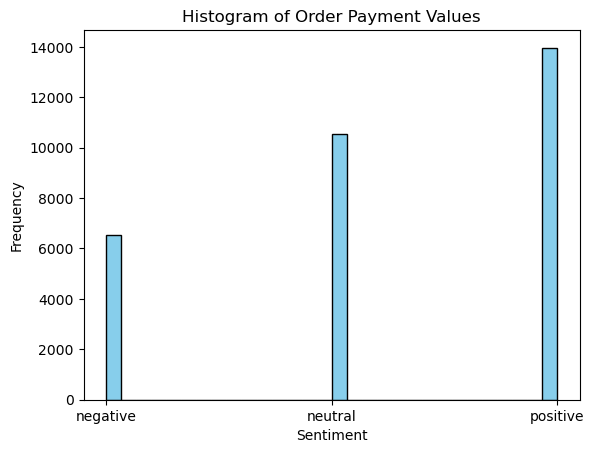

In [14]:
# List of file names
file_names = [
    "../src/fase1_Bitcoin.csv",
    "../src/fase1_cryptonews.csv",
    "../src/fase1_Bitcoin_prices.csv"
]

# Dictionary to store dataframes
dfs = {}

# Import each CSV file into a dataframe and store it in the dictionary
for file_name in file_names:
    df = pd.read_csv(file_name)
    # Store the dataframe with a key based on the file name
    dfs[file_name] = df

# Accessing the dataframes
# For example, to access the dataframe from olist_orders_dataset.csv
print(dfs["../src/fase1_Bitcoin.csv"],
    ["../src/fase1_Bitcoin_prices.csv"],
    ["../src/fase1_cryptonews.csv"])

# Example visualization
# Plotting a histogram of order payment values
#title,score,id,url,comms_num,created,body,timestamp
crypto_news_df = dfs["../src/fase1_cryptonews.csv"]
#transform sentiment from object
crypto_news_df.loc[0, 'sentiment']

def get_sentiment_verdict(data):
    data = eval(data)
    return data['class']

crypto_news_df['sentiment'] = crypto_news_df['sentiment'].apply(get_sentiment_verdict)


## histogram

plt.hist(crypto_news_df["sentiment"], bins=30, color='skyblue', edgecolor='black')

plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Histogram of Order Payment Values')
plt.show()


In [15]:
! pip install vaderSentiment

   ---------------------------------------- 0.0/126.0 kB ? eta -:--:--
   --- ------------------------------------ 10.2/126.0 kB ? eta -:--:--
   ----------------------------- ---------- 92.2/126.0 kB 1.3 MB/s eta 0:00:01
   ---------------------------------------- 126.0/126.0 kB 1.9 MB/s eta 0:00:00


In [1]:
from time import sleep
import json
import pandas as pd
import io
import re
import numpy as np
from tqdm import tqdm
import pandas as pd
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from tqdm import tnrange, tqdm_notebook, tqdm

from sklearn import preprocessing
import matplotlib.pyplot as plt
# from plotly.offline import init_notebook_mode, iplot
# import plotly.graph_objs as go
# init_notebook_mode(connected=True)
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('../src/'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

../src/Bitcoin_tweets.csv
../src/Bitcoin_tweets_dataset_2.csv
../src/fase1_Bitcoin.csv
../src/fase1_Bitcoin_prices.csv
../src/fase1_cryptonews.csv
../src/fase2_btc-results.csv
../src/fase2_BTC_Footprints_v1.xlsx
../src/fase2_miner-devices.csv


In [2]:
tweets_raw_file   = '../src/Bitcoin_tweets_dataset_2.csv'
tweets_clean_file = '../src/Bitcoin_tweets_clean.csv'
bit_price_file2 = '../src/fase1_Bitcoin_prices.csv'

In [7]:
try:
    # Attempt to read the CSV file
    df_raw = pd.read_csv(tweets_raw_file, low_memory=True)
    
    # Print the shape and first few rows of the DataFrame
    print(df_raw.shape)
    print(df_raw.head(5))
    
    # Further data processing or analysis
    
except pd.errors.ParserError as e:
    # Handle the ParserError
    print("ParserError:", e)

ParserError: Error tokenizing data. C error: Buffer overflow caught - possible malformed input file.

